In [251]:
%pip install afterglowpy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import sncosmo
try:
    import afterglowpy
except:
    raise ImportError("could not import afterglowpy ; run pip install afterglowpy")


# from .core import Transient


__all__ = ["Afterglow"]


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [260]:
#phases = np.linspace(1.0e3, 1.0e7, 100)
wave = np.linspace(3600,8000,6)

#nu = np.empty(phases.shape)
#nu[:] = 1.0e18

# grb_params = {'jetType':     afterglowpy.jet.TopHat,     # Top-Hat jet
#               'specType':    0,                          # Basic Synchrotron Emission Spectrum

#               'thetaObs':    0.05,   # Viewing angle in radians
#               'E0':          1.0e53, # Isotropic-equivalent energy in erg
#               'thetaCore':   0.1,    # Half-opening angle in radians
#               'n0':          1.0,    # circumburst density in cm^{-3}
#               'p':           2.2,    # electron energy distribution index
#               'epsilon_e':   0.1,    # epsilon_e
#               'epsilon_B':   0.01,   # epsilon_B
#               'xi_N':        1.0,    # Fraction of electrons accelerated
#               'd_L':         1.0e28, # Luminosity distance in cm
#               'z':           0.55}   # redshift
     
# # explicitly case E0 and d_L as float as they like to be an int
# grb_params["E0"] = float(grb_params["E0"])
# grb_params["d_L"] = float(grb_params["d_L"])

6

In [253]:

#  flux = []
#  for phase in phases:
#      t = phase * np.ones(nu.shape)
#      mJys = afterglowpy.fluxDensity(t, nu, **grb_params)
#      Jys = 1e-3 * mJys
#      # convert to erg/s/cm^2/A
#      flux.append(Jys * 2.99792458e-05 / (wave**2))

# # template = sncosmo.Model(sncosmo.TimeSeriesSource(phases, wave, np.array(flux)))



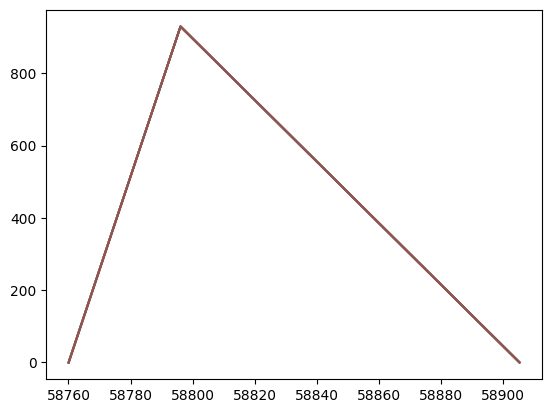

In [272]:

tr = np.random.uniform(10,100)
td = np.random.uniform(tr,200)
t0 = np.random.uniform(58300,60500)
A = np.random.uniform(50,1000)


times = np.linspace(t0 - tr,t0 + td,1000)
times = np.unique(np.concatenate(([t0],times))) #making sure t0 is in there


fluxes = np.empty(len(times))
for i, time in enumerate(times):
    if i == 0:
        fluxes[0] = 0
    elif i != 0:
        if time == t0:
            flux = A         
        elif time < t0: #rising
            flux = fluxes[i-1] + (A/tr * (times[i] - times[i-1]))
        elif time > t0: #decaying
            flux = fluxes[i-1] + (-A/td * (times[i] - times[i-1])) 

        fluxes[i] = flux
    

#flux.shape
#.shape
#np.atleast


#This block of code is to fix the formatting of the 'fluxes' variable so that it can work in sncosmo.TimeSeriesSource()
list2 = []
for flux in fluxes:
    list1 = []
    for i in range(len(wave)): #len(wave) = number of wavelengths
        list1.append(flux)
    list2.append(list1)
fluxes = list2
fluxes = np.array(fluxes)




plt.plot(times,fluxes)


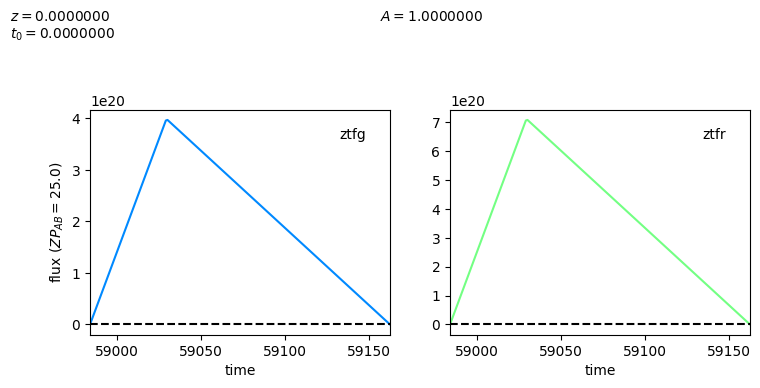

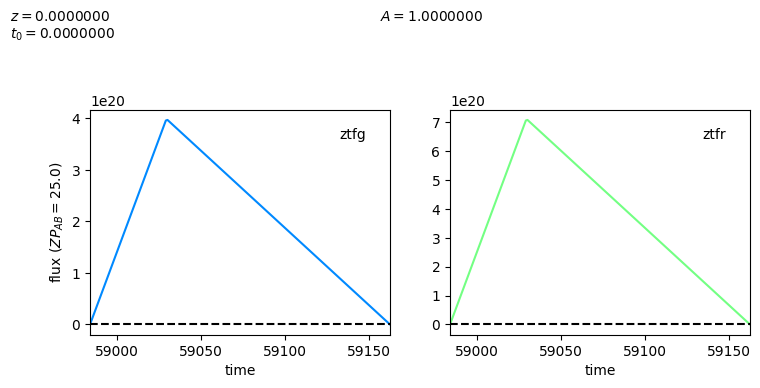

In [269]:

template = sncosmo.Model(sncosmo.TimeSeriesSource(times, wave, np.array(fluxes)))


sncosmo.plot_lc(model = template, bands = ['ztfg', 'ztfr'])

In [270]:
class Afterglow( Transient ):

    _KIND = "afterglow"
    _TEMPLATE = template
    _RATE = 20
    _MODEL = dict( redshift = {"kwargs":{"zmax":0.2},
                                  "as":"z"},

                   t0 = {"func": np.random.uniform,
                         "kwargs": {"low":58300, "high":60500} },

                   )

